# Artificial Intelligence
# 464/664
# Assignment #3

## General Directions for this Assignment

00. We're using a Jupyter Notebook environment (tutorial available here: https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/what_is_jupyter.html),
01. Read the entire notebook before beginning your work, 
02. Output format should be exactly as requested, 
03. Each helper function should be preceeded by documentation (Markdown cell),
05. No comments in the code; anything worth mentioning should be included in the documentation,
06. Keep functions to 20 lines or less (including empty lines so do not add any),
08. Use descriptive variable names,
09. Functions should do only one thing,
10. Check submission deadline on Gradescope, 
11. Rename the file to Last_First_assignment_2, 
12. Submit your notebook (as .ipynb, not PDF) using Gradescope, and
13. Do not submit any other files.


## Directions _not_ applicable for this Assignment:
* Do not use classes,
* Each helper function should be followed by three assert-style unit tests.


## Before You Submit...

1. Re-read the general instructions provided above, and
2. Hit "Kernel"->"Restart & Run All".

# Problem #1: Multiagent Systems

## The World

A `List of Lists` is used to represent the world. Cells marked as '⬛' are obstacles in the world and are not traversable.

In [1]:
world = [
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬛','⬛','⬛','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬛','⬛','⬛','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬛','⬛','⬛','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜']]

In [2]:
# A nicer view of the world, without commas and brackets
for row in world:
    print("".join(row))

⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬛⬛⬛⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬛⬛⬛⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬛⬛⬛⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜


## Robot

Our robot '🤖' starts at the bottom left and can either move up, down, left, or right. It's looking for the '❤️' in the world. 

In [3]:
MOVES = [(-1,0), (0,1), (1,0), (0,-1)] # Up Right Down Left

In [4]:
start = (len(world)-1, 0)

In [5]:
goal = (0, len(world)-1)

## Other Agents

There are four other agents in the world: '🚎', '🚎', '🚎', and '🚎'.

In [6]:
# Update the world with this information
world[start[0]][start[1]] = '🤖'
world[start[0]][start[1]+2] = '🚎'
world[start[0]][start[1]+4] = '🚎'
world[start[0]][start[1]+6] = '🚎'
world[start[0]][start[1]+8] = '🚎'
world[goal[0]][goal[1]] = '❤️'

In [7]:
# A nicer view of the world, without commas and brackets
for row in world:
    print("".join(row))

⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜❤️
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬛⬛⬛⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬛⬛⬛⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬛⬛⬛⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
🤖⬜🚎⬜🚎⬜🚎⬜🚎⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜


## Problem #1


'🤖' is your robot from Assignment #1 and uses the A$^*$ search function to find the optimal path to goal. Each '🚎' has no such capability; all it can do is swarm. Each '🚎' uses Boids Rules (repulsion and attraction only) with another '🚎' and '🤖'. Implement this multiagent system consisting of an intelligent '🤖' robot and four '🚎' agents. 

* Our A$^*$ robot '🤖' does not use Boids Rule, but is the de-facto leader of the swarm since the '🚎' agents swarm with it. 

* Print out the resulting view of the world ('🤖', '🚎', '⬛', and '❤️' icons) **for each step** '🤖' takes on its way to '❤️'. (Assignment #1 only asked for the final output. This assignment asks for a print of the world after each step taken by '🤖'.)

* Use a repulsion range of 2 and a suitable attraction range that keeps the swarm together.

* '🚎' shouldn't leave the world

* '🚎' locations may need to be rounded when placed on the world for printing

## get_neighbors

Returns the neighbors of a given position.

* **pos** Tuple: the position to get the neighbors of

**returns**

* **neighbors** List: a list of neighboring positions

In [8]:
def get_neighbors(pos):
    neighbors = []
    for dx, dy in MOVES:
        new_pos = (pos[0] + dx, pos[1] + dy)
        if not 0 <= new_pos[0] < len(world): continue
        if not 0 <= new_pos[1] < len(world[0]): continue
        if world[new_pos[0]][new_pos[1]] == '⬛': continue
        neighbors.append(new_pos)
    return neighbors

## heuristic

Returns the heuristic distance between two positions.

* **a** Tuple: the first position
* **b** Tuple: the second position

**returns**

* **distance** Float: the heuristic distance between the two positions

In [9]:
def heuristic(a, b):
    return ((b[0] - a[0]) ** 2 + (b[1] - a[1]) ** 2) ** 0.5

## a_star_search

Performs an A$^*$ search on the world to find the optimal path from the start to the goal.

* **world** List[List[str]]: the world to search on
* **start** Tuple: the starting position
* **goal** Tuple: the goal position

**returns**

* **path** List[Tuple]: the optimal path from the start to the goal


In [10]:
def a_star_search(world, start, goal):
    open_set, came_from, g_score, f_score = {start}, {}, {start: 0}, {start: heuristic(start, goal)}
    while open_set:
        current = min(open_set, key=lambda x: f_score[x])
        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            return path[::-1]
        open_set.remove(current)
        for neighbor in get_neighbors(current):
            tentative_g_score = g_score[current] + 1
            if tentative_g_score < g_score.get(neighbor, float('inf')):
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                f_score[neighbor] = g_score[neighbor] + heuristic(neighbor, goal)
                if neighbor not in open_set:
                    open_set.add(neighbor)

Get the path from the start to the goal using A$^*$ search.

Get list of obstacles.

Set environment constants for Boids force.

In [11]:
from random import choice, shuffle

path = a_star_search(world, start, goal)
path_set = set(path)

obstacles = set()
for i in range(len(world)):
    for j in range(len(world[0])):
        if world[i][j] == '⬛':
            obstacles.add((i, j))

repulsion_range = 2
attraction_range = 4

## boids_force

Calculates the force exerted on one position by another. x1 y1 is our main actor whose being pushed by x2 y2

* **x1** Int: the x-coordinate of the main actor
* **y1** Int: the y-coordinate of the main actor
* **x2** Int: the x-coordinate of the other actor
* **y2** Int: the y-coordinate of the other actor
* **x2_vel** Int: the x-velocity of the other actor
* **y2_vel** Int: the y-velocity of the other actor

**returns**

* **dx** Int: the x-component of the force
* **dy** Int: the y-component of the force


In [12]:
def boids_force(x1, y1, x2, y2, x2_vel, y2_vel):
    distance = ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5
    dx, dy = 0, 0
    if distance < repulsion_range:
        repulsion_strength = 10 / (distance + 0.1)
        if x1 == x2: dx += choice([-3, 3])
        else: dx += (x1 - x2) * repulsion_strength
        if y1 == y2: dy += choice([-3, 3])
        else: dy += (y1 - y2) * repulsion_strength
    elif repulsion_range <= distance <= attraction_range:
        attraction_strength = 5
        dx += (x2 - x1) * attraction_strength
        dy += (y2 - y1) * attraction_strength
    if distance <= attraction_range:
        alignment_strength = 5
        dx += x2_vel * alignment_strength
        dy += y2_vel * alignment_strength
    return dx, dy


## repulsion_force

Calculates the repulsion force on the drones at short distances.

* **new_positions** List[Tuple]: the positions of the drones
* **robot_pos** Tuple: the position of the robot

**returns**

* **drone_positions** List[Tuple]: the positions of the drones after emphasizing the repulsion force


In [13]:
def repulsion_force(new_positions, robot_pos):
    curr_positions = set([robot_pos])
    def is_valid(x, y):
        if not 0 <= x < len(world) or not 0 <= y < len(world[0]): return False
        if (x, y) in obstacles: return False
        if (x, y) in curr_positions: return False
        return True
    drone_positions = []
    for x, y, a, b in new_positions:
        new_x, new_y = x, y
        if (x, y) in curr_positions:
            shuff_moves = MOVES.copy()
            shuffle(shuff_moves)
            for dx, dy in shuff_moves:
                if is_valid(x + dx, y + dy):
                    new_x, new_y = x + dx, y + dy
                    break
        drone_positions.append((new_x, new_y, a, b))
        curr_positions.add((new_x, new_y))
    return drone_positions


## add_up_forces

Adds up the forces exerted on a position by all other positions, which will be the net (unnormalized) velocity vector of the position.

* **i** Int: the index of the position to add the forces to
* **x1** Int: the x-coordinate of the position to add the forces to
* **y1** Int: the y-coordinate of the position to add the forces to
* **positions** List[Tuple]: the positions of all actors

**returns**

* **dx** Int: the x-component of the net force
* **dy** Int: the y-component of the net force

In [14]:
def add_up_forces(i, x1, y1, positions):
    dx, dy = 0, 0
    for j, other_pos in enumerate(positions):
        if i == j: continue
        x2, y2, x2_vel, y2_vel = other_pos
        curr_dx, curr_dy = boids_force(x1, y1, x2, y2, x2_vel, y2_vel)
        dx += curr_dx
        dy += curr_dy
    return dx, dy


## boids_get_next_frame

Calculates the next frame of the swarm, given the positions of all actors. Takes into account the Boids rules of repulsion, attraction, and alignment.

* **world** List[List[str]]: the world to calculate the next frame on
* **positions** List[Tuple]: the positions of all actors
* **robot_pos** Tuple: the position of the robot

**returns**

* **new_positions** List[Tuple]: the positions of all actors after the next frame

In [15]:
def boids_get_next_frame(world, positions, robot_pos):
    new_positions = []
    for i, pos in enumerate(positions):
        x1, y1, _, _ = pos
        dx, dy = add_up_forces(i, x1, y1, positions)
        x2, y2 = robot_pos
        curr_dx, curr_dy = boids_force(x1, y1, x2, y2, 0, 0)
        dx += curr_dx
        dy += curr_dy
        dx /= len(positions) + 1
        dy /= len(positions) + 1
        inertia_factor = 0.75
        new_x = round(x1 + dx * (1 - inertia_factor))
        new_y = round(y1 + dy * (1 - inertia_factor))
        new_x = max(0, min(len(world[0])-1, new_x))
        new_y = max(0, min(len(world)-1, new_y))
        if (new_x, new_y) in obstacles: new_x, new_y = x1, y1
        x1_vel, y1_vel = new_x - x1, new_y - y1
        new_positions.append((new_x, new_y, x1_vel, y1_vel))
    return repulsion_force(new_positions, robot_pos)


## print_world

Prints the world, given the positions of the obstacles, drones, robot, and robot path.

* **obstacles** Set[Tuple]: the positions of the obstacles
* **drone_positions** List[Tuple]: the positions of the drones
* **robot_pos** Tuple: the position of the robot
* **robot_path** List[Tuple]: the path of the robot

returns None

In [16]:
def print_world(obstacles, drone_positions, robot_pos, robot_path):
    new_world = world.copy()
    for i in range(len(new_world)):
        for j in range(len(new_world[0])):
            if (i, j) in obstacles:
                new_world[i][j] = '⬛'
            elif (i, j) == robot_pos:
                new_world[i][j] = '🤖'
            elif (i, j) == goal:
                new_world[i][j] = '❤️'
            elif (i, j) in drone_positions:
                new_world[i][j] = '🚎'
            elif (i, j) in robot_path:
                new_world[i][j] = '🟢'
            else:
                new_world[i][j] = '⬜'
    for row in new_world:
        print("".join(row))
    print()

get initial positions of drones and of the robot, then use the boids_get_next_frame() function to calculate the next frame of the swarm, for each frame in the series of frames that make up the robot's path.

In [17]:
drone_velocity_vectors = []
robot_pos = None

for i in range(len(world)):
    for j in range(len(world[0])):
        if world[i][j] == '🚎':
            drone_velocity_vectors.append((i, j, 0, 0)) # (x, y, x_vel, y_vel)
        elif world[i][j] == '🤖':
            robot_pos = (i, j)

robot_path = [robot_pos]
for robot_pos in path:
    robot_path.append(robot_pos)
    drone_velocity_vectors = boids_get_next_frame(world, drone_velocity_vectors, robot_pos)
    drone_positions = [(x, y) for x, y, _, _ in drone_velocity_vectors]
    print_world(obstacles, drone_positions, robot_pos, robot_path) 

⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜❤️
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬛⬛⬛⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬛⬛⬛⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬛⬛⬛⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
🤖⬜⬜🚎🚎🚎🚎⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜

⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜❤️
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬛⬛⬛⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬛⬛⬛⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬛⬛⬛⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
🤖⬜⬜⬜🚎⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
🟢⬜🚎⬜🚎🚎⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜

⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜❤️
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜

# Problem #2: Game Theory

We are designing an experiment where two players employ the *Best Response with Inertia* algorithm against each other.

## Best Response with Inertia Algorithm

Here is the outline of the algorithm for each player:


```
On day zero, play a random action

On day t, do one of two things:

    * With high probability, play the best response to what your opponent did yesterday, or
    * With low probability, be lazy and just do what you did yesterday.
```

## Game

The particular 2x2 game being played is the Stag-Hunt game, with the matrix:


|  | | |
|---|---|---|
|  | S | H |
| S | 3, 3 | 0, 2 |
| H | 2, 0 | 2, 2 |


Player 1 (P1) is the `row` player; Player 2 (P2) is the `col` player.

In [18]:
import random
import matplotlib.pyplot as plt

In [19]:
# The actions available to each player. Don't modify. 
actions_P1 = ['S', 'H']
actions_P2 = ['S', 'H']

# Store the history. Don't modify. 
history_P1_action, history_P1_utility = [], []
history_P2_action, history_P2_utility = [], []

<a id="get_utility"></a>
## get_utility

This function takes a joint action tuple and returns the utility for each player, packaged as a tuple. It is hardcoded for the Stag-Hunt game described above.

* **a** Tuple: joint action. a could be ('S', 'H'), for instance, which would signify that P1 has chosen to do 'S' and P2 has chosen to do 'H'.


**returns** 

* **utility** Tuple: the utility for each player as (utility of P1, utility of P2). For example, if the input is ('S', 'H'), the returned value is (0, 2) -- 0 for P1, 2 for P2. 

In [20]:
def get_utility(a):
    if a[0] == 'S' and a[1] == 'S':
        return (3, 3)
    elif a[0] == 'S' and a[1] == 'H':
        return (0, 2)
    elif a[0] == 'H' and a[1] == 'S':
        return (2, 0)
    elif a[0] == 'H' and a[1] == 'H':
        return (2, 2)

<div style="background: lemonchiffon; margin:20px; padding: 20px;">
    <p>
        TODO: Help players pick actions based on the <i>Best Response with inertia</i> algorithm described above (instead of just picking 'S' like they are now). 
    </p>
</div>

## calculate_action

Calculates the action of a player based on the Best Response with Inertia algorithm. If no moves have been played, it will make a random move. Otherwise, with some low probability, it will play the same move it did last game ("lazy response"). With the remaining probability, it will play the best response to the opponent's last action.

* **protagonist_history** List[Str]: the history of the protagonist's actions
* **opponent_history** List[Str]: the history of the opponent's actions
* **is_P1** Bool: whether the protagonist is Player 1
* **prob_play_best** Float: the probability that the protagonist will play the best response to the opponent's last action

**returns**

* **action** Str: the action of the protagonist


In [21]:
def calculate_action(protagonist_history, opponent_history, is_P1, prob_play_best):
  if not protagonist_history:
    return random.choice(actions_P1) if is_P1 else random.choice(actions_P2)
  elif random.random() > prob_play_best:
    return protagonist_history[-1]
  else:
    best_response_to = {'S': 'S', 'H': 'H'}
    return best_response_to[opponent_history[-1]]

<a id="run_experiment"></a>
## run_experiment

This functions runs an experiment where two players play the Stag-Hunt game using the Best Response with Inertia algorithm.

* **num_trials** Int: The number of trials to run
* **num_days** Int: The number of days in each trial
* **debug** Bool: If set to True, statements are printed out


**returns** 

None

In [22]:
def run_experiment(num_trials, num_days, debug=False):
    if debug: print(f"Trial\tDay\tP1\tP2\n--------------------------")
    for trial in range(num_trials):  
        if debug: print(f"--------------------------")
        p1_trial_history = []
        p2_trial_history = []
        for day in range(num_days):
            high = 0.75
            action_P1 = calculate_action(p1_trial_history, p2_trial_history, is_P1=True, prob_play_best=high)
            action_P2 = calculate_action(p2_trial_history, p1_trial_history, is_P1=False, prob_play_best=high)
            p1_trial_history.append(action_P1)
            p2_trial_history.append(action_P2)
            # Don't modify below:
            utility_P1, utility_P2 = get_utility(tuple((action_P1, action_P2)))
            history_P1_action.append(action_P1)
            history_P2_action.append(action_P2)
            history_P1_utility.append(utility_P1)
            history_P2_utility.append(utility_P2)
            if debug: print(f"{trial}\t{day}\t{action_P1}\t{action_P2}")

In [23]:
# Parameters. Don't modify. Not even debug flag. 
run_experiment(num_trials=20, num_days=10, debug=True)

Trial	Day	P1	P2
--------------------------
--------------------------
0	0	S	S
0	1	S	S
0	2	S	S
0	3	S	S
0	4	S	S
0	5	S	S
0	6	S	S
0	7	S	S
0	8	S	S
0	9	S	S
--------------------------
1	0	S	S
1	1	S	S
1	2	S	S
1	3	S	S
1	4	S	S
1	5	S	S
1	6	S	S
1	7	S	S
1	8	S	S
1	9	S	S
--------------------------
2	0	H	H
2	1	H	H
2	2	H	H
2	3	H	H
2	4	H	H
2	5	H	H
2	6	H	H
2	7	H	H
2	8	H	H
2	9	H	H
--------------------------
3	0	S	S
3	1	S	S
3	2	S	S
3	3	S	S
3	4	S	S
3	5	S	S
3	6	S	S
3	7	S	S
3	8	S	S
3	9	S	S
--------------------------
4	0	S	S
4	1	S	S
4	2	S	S
4	3	S	S
4	4	S	S
4	5	S	S
4	6	S	S
4	7	S	S
4	8	S	S
4	9	S	S
--------------------------
5	0	H	S
5	1	S	H
5	2	H	S
5	3	S	H
5	4	H	S
5	5	H	H
5	6	H	H
5	7	H	H
5	8	H	H
5	9	H	H
--------------------------
6	0	H	H
6	1	H	H
6	2	H	H
6	3	H	H
6	4	H	H
6	5	H	H
6	6	H	H
6	7	H	H
6	8	H	H
6	9	H	H
--------------------------
7	0	H	H
7	1	H	H
7	2	H	H
7	3	H	H
7	4	H	H
7	5	H	H
7	6	H	H
7	7	H	H
7	8	H	H
7	9	H	H
--------------------------
8	0	S	H
8	1	H	S
8	2	S	S
8	3	S	S
8	4	S	S
8	5	S	S
8	6	S	S
8	7	S	S
8	8	S	S
8	

<a id="plot_results"></a>
## plot_results

This functions plots the results of an experiment using a bar chart.

* **history_P1_action** List[Str]: The history of Player 1's actions over the course of the experiment 
* **history_P2_action** List[Str]: The history of Player 2's actions over the course of the experiment 


**returns** 

None

In [24]:
def plot_results(history_P1_action, history_P2_action):
    labels = ['(S,S)', '(S,H)', '(H,S)', '(H,H)']
    cell_counts = [0, 0, 0, 0]
    for i in range(len(history_P1_action)):
        if history_P1_action[i] == 'S' and history_P2_action[i] == 'S':
            cell_counts[0]+=1
        if history_P1_action[i] == 'S' and history_P2_action[i] == 'H':
            cell_counts[1]+=1
        if history_P1_action[i] == 'H' and history_P2_action[i] == 'S':
            cell_counts[2]+=1
        if history_P1_action[i] == 'H' and history_P2_action[i] == 'H':
            cell_counts[3]+=1
    plt.bar(labels, cell_counts)
    plt.show()

history 1 ['S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'H', 'S', 'H', 'S', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'S', 'H', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'H', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'S', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',

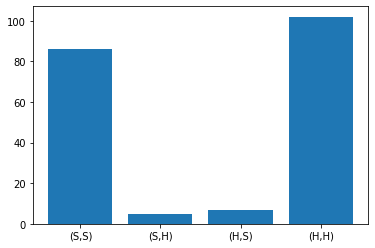

In [25]:
# Visualize the results. Don't modify. 
print('history 1', history_P1_action)
print('history 2', history_P2_action)
plot_results(history_P1_action, history_P2_action)

| Question | Response | 
|------|------|
|Where do agents get spend most of their time? | Agents spend most of their time in the (S, S) and (H, H) scenario, with approximately equal time spent in each.<br/><br/>This makes sense, because (S, H) and (H, S) are unstable scenarios (i.e. not Nash equilibria), and (S, S) and (H, H) are stable scenarios (i.e. Nash equilibria). This is because in the event of (S, H) or (H, S), the optimal choice for both is to choose the opposite, and they will keep oscillating back and forth until by chance one of them chooses the lazy scenario. So, our table may go from a non-nash equilibrium to a Nash equilibrium, but it will never go the other way around, because both scenarios for choosing an agent's next action in a Nash equilibrium — choosing your last response lazily, and choosing the best response to your opponent's last response — are the same, and remain in the Nash equilibrium.


✅ Roughly 50-50 between (S,S) and (H,H)

## Before You Submit...

1. Re-read the general instructions provided above, and
2. Hit "Kernel"->"Restart & Run All".